In [2]:
from tabulate import tabulate
import os

# Initialize table_data
table_data = []

# List of book file names to process
book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Loop through each book file
for file_name in book_file_names:
    # Extract file name without extension
    name = os.path.splitext(file_name)[0]

    # Load book text from file
    with open(file_name, "r", encoding="utf-8") as f:
        text = f.read()

    # Count number of words in book
    word_count = len(text.split())

    # Append data to the table
    table_data.append([name, word_count])

# Print the table if there is any data
if table_data:
    headers = ["File Name", "Word Count"]
    table = tabulate(table_data, headers=headers, tablefmt="pretty")
    print(table)
else:
    print("No books with text files found.")

+----------------------------------+------------+
|            File Name             | Word Count |
+----------------------------------+------------+
|   Book 01- Echoes of Tomorrow    |   10605    |
| Book 02 - Whispers of the Abyss  |   12593    |
| Book 03 - Shadows of the Horizon |    9113    |
| Book 04 - Luminance of the Void  |    9140    |
|   Book 05- Whirlwinds of Time    |    5362    |
+----------------------------------+------------+


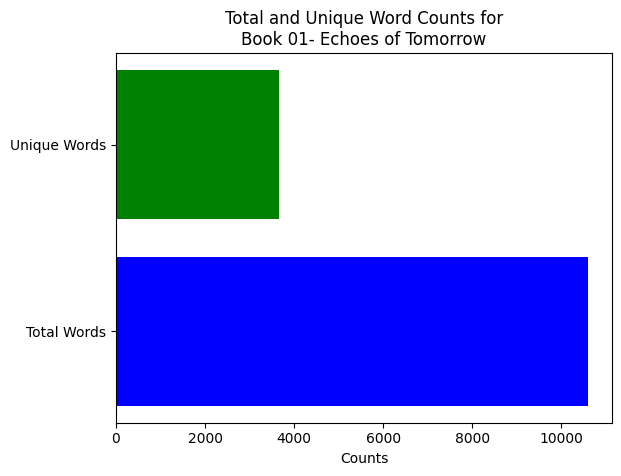

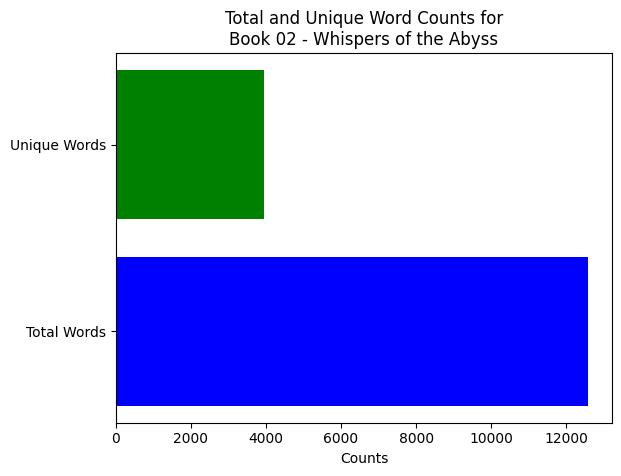

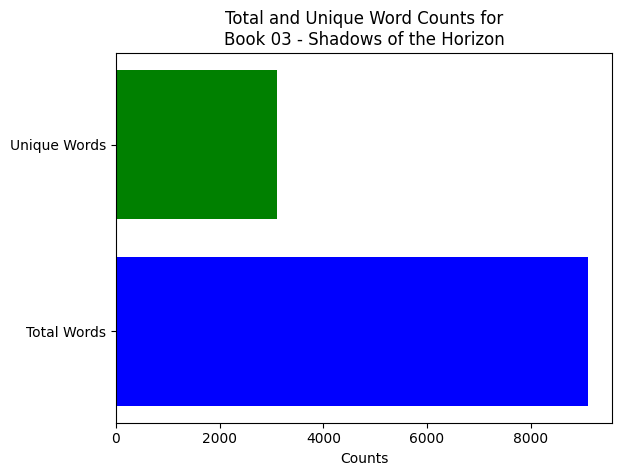

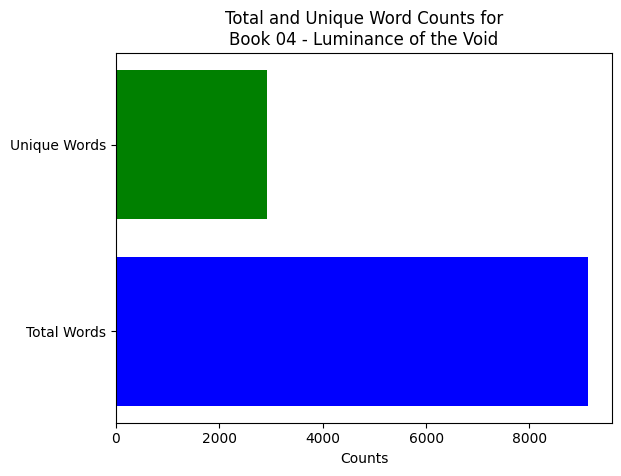

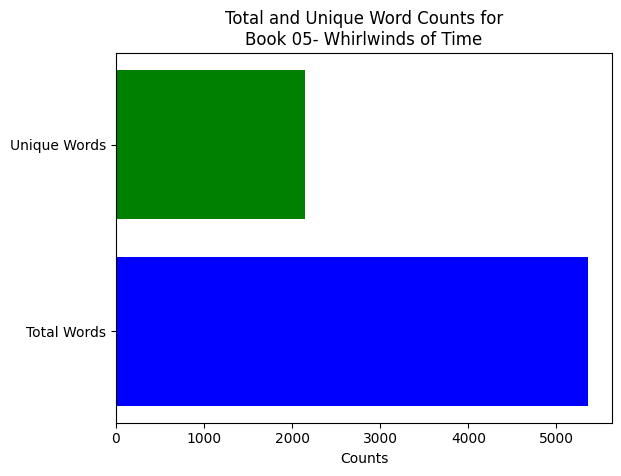

In [3]:
import os
import matplotlib.pyplot as plt

# Book file paths
BOOKS_DIR = ''  # Directory for the book files
book_file_paths = [os.path.join(BOOKS_DIR, file_name) for file_name in book_file_names]

# Loop through each book file
for file_path in book_file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
        word_count = len(text.split())
        unique_word_count = len(set(text.split()))

        # Create a horizontal bar chart for this book
        title = os.path.splitext(os.path.basename(file_path))[0]  # Extract title from file name
        y = ['Total Words', 'Unique Words']
        x = [word_count, unique_word_count]
        plt.barh(y, x, color=['blue', 'green'])

        plt.xlabel('Counts')
        plt.title(f'Total and Unique Word Counts for\n{title}')
        plt.show()

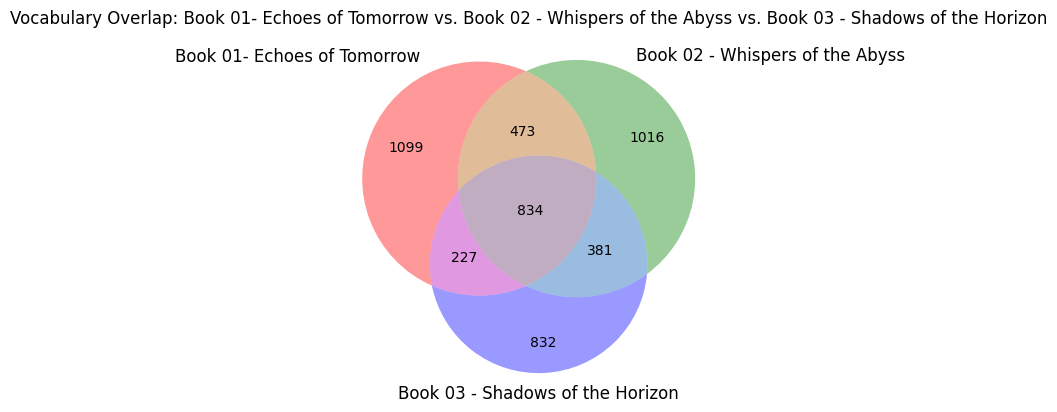

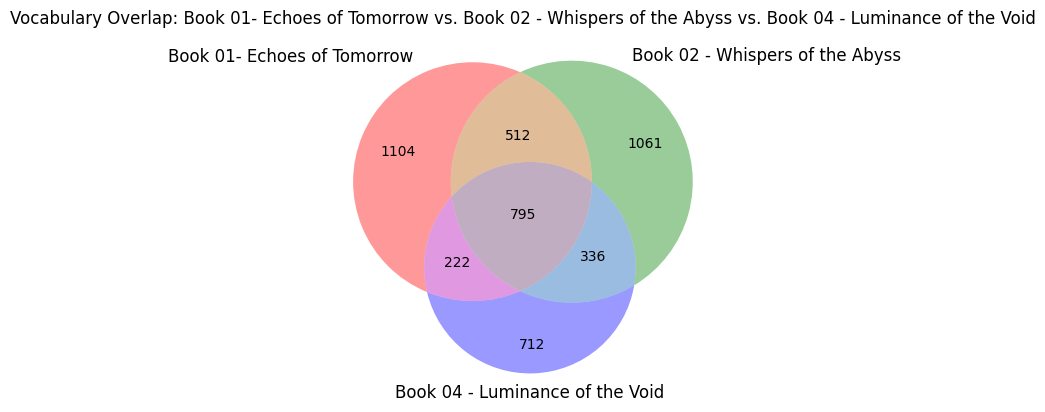

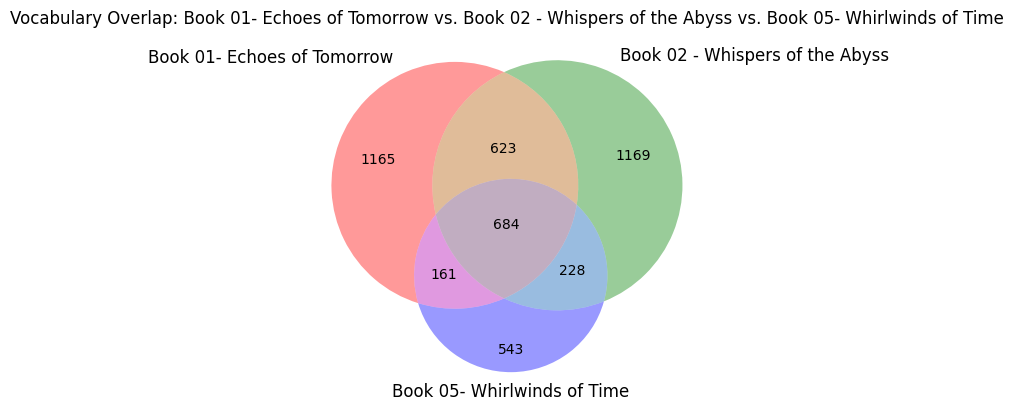

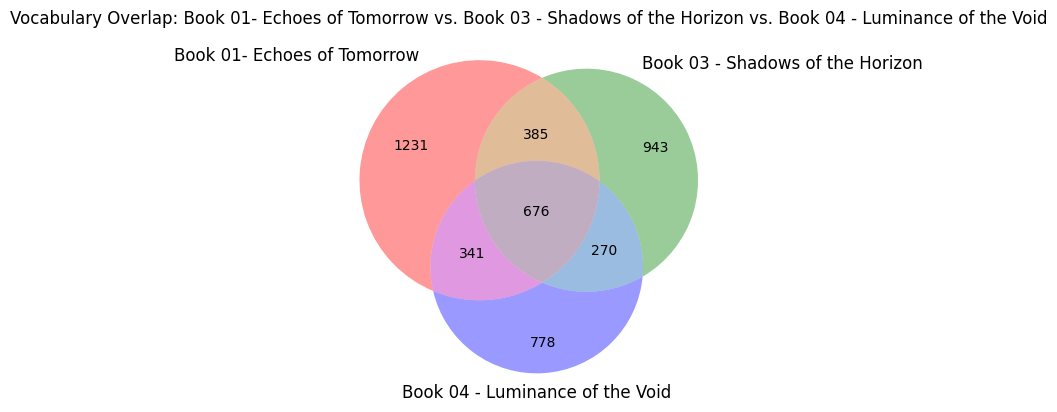

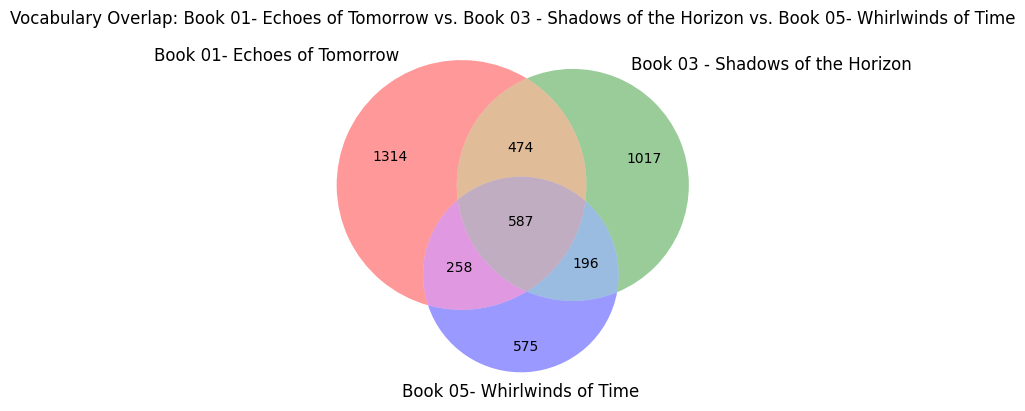

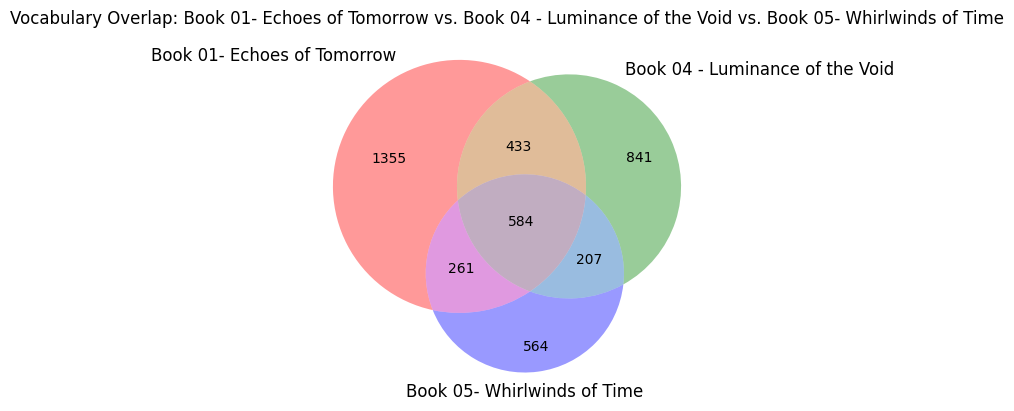

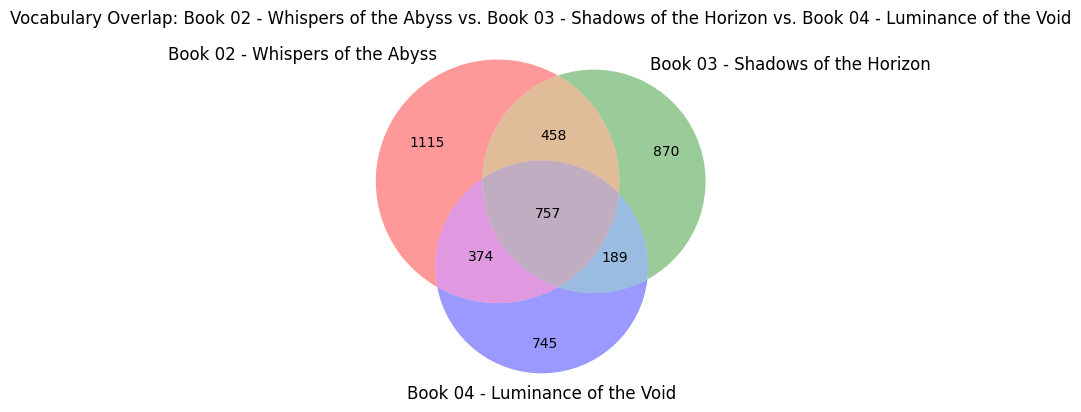

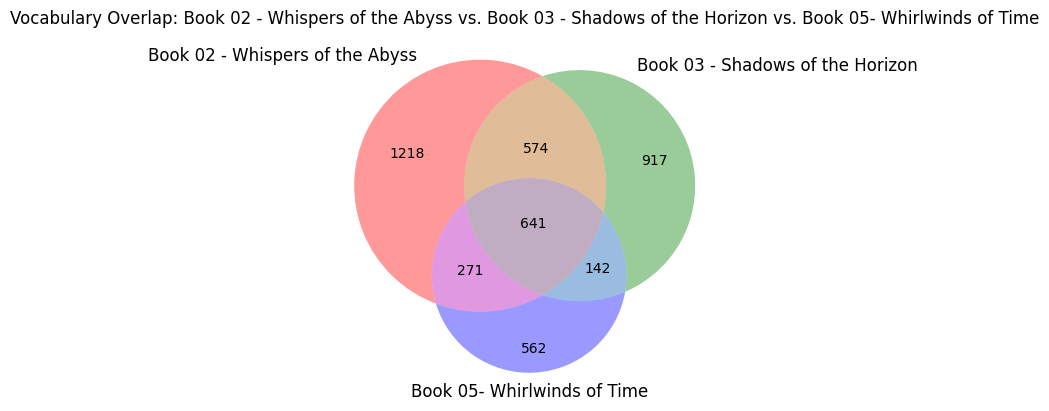

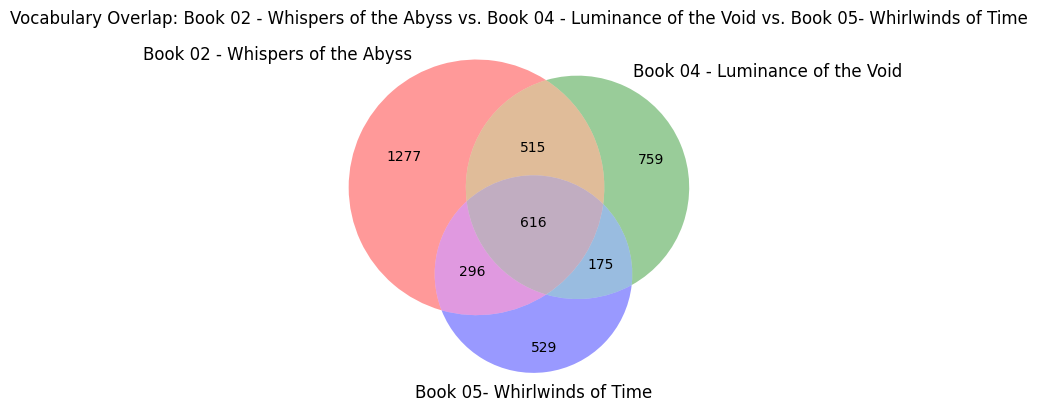

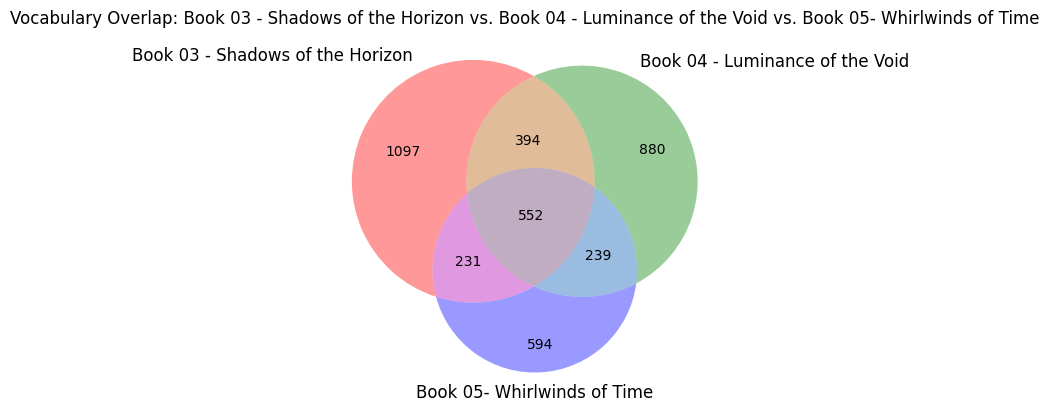

In [5]:
import os
from itertools import combinations
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import re

# Function to tokenize words in a text
def tokenize_words(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # Tokenize words using regex
    return set(words)

# Book file paths
BOOKS_DIR = ''  # Directory for the book files
book_file_paths = [os.path.join(BOOKS_DIR, file_name) for file_name in book_file_names]

# Create word sets for each book
book_info = []
for file_path in book_file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        title = os.path.splitext(os.path.basename(file_path))[0]  # Extract title from file name
        text = f.read()
        words_set = tokenize_words(text)
        book_info.append({'title': title, 'words_set': words_set})

# Create Venn diagrams for all possible combinations of 3 books (if available)
combinations_3 = list(combinations(book_info, 3))
for combo in combinations_3:
    word_sets = {}
    for book in combo:
        title = book['title']
        word_sets[title] = book['words_set']

    venn3(subsets=word_sets.values(), set_labels=word_sets.keys())
    plt.title('Vocabulary Overlap: ' + ' vs. '.join(word_sets.keys()))
    plt.show()


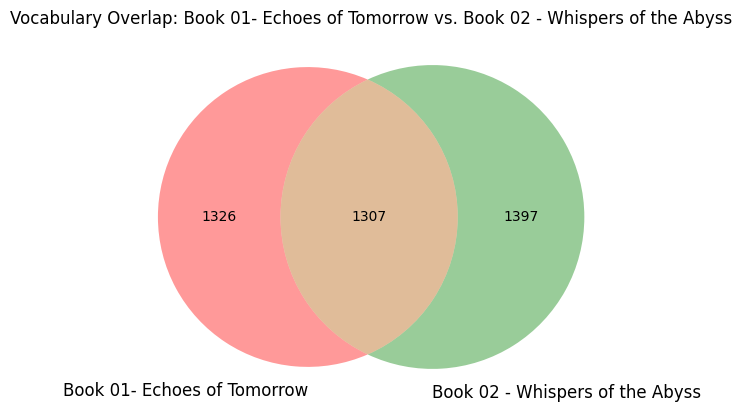

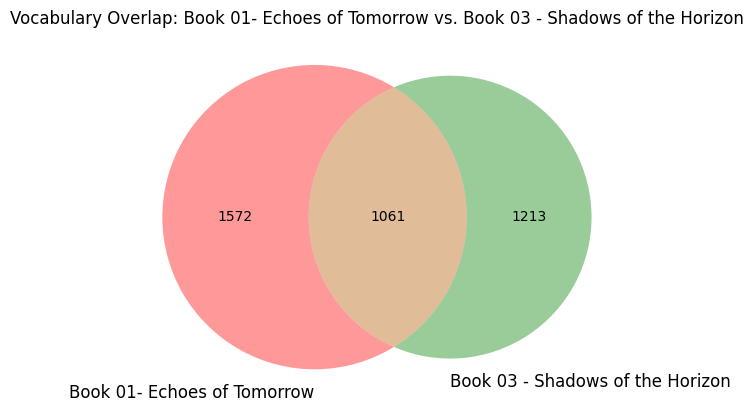

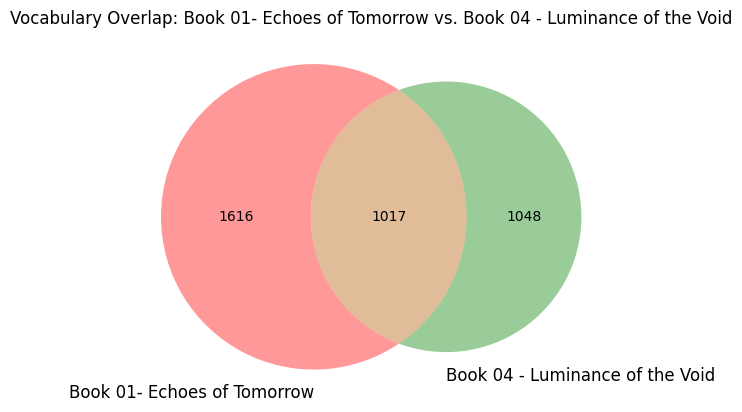

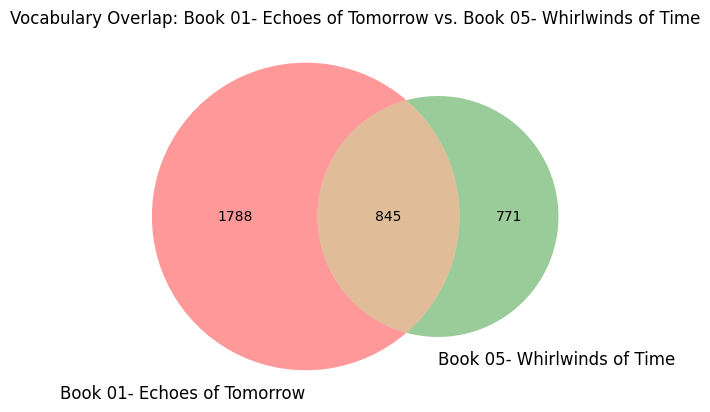

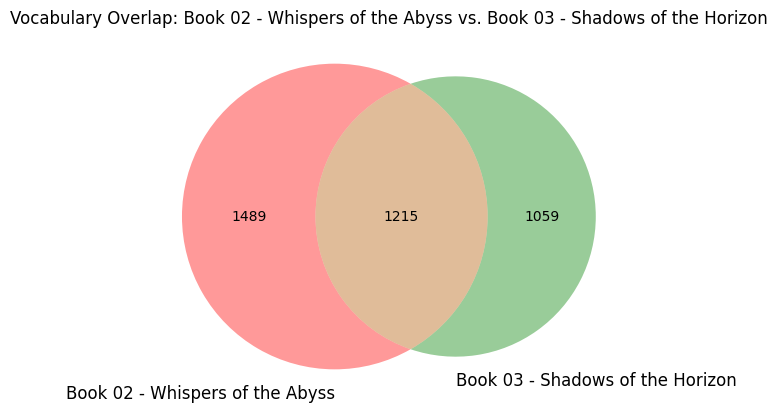

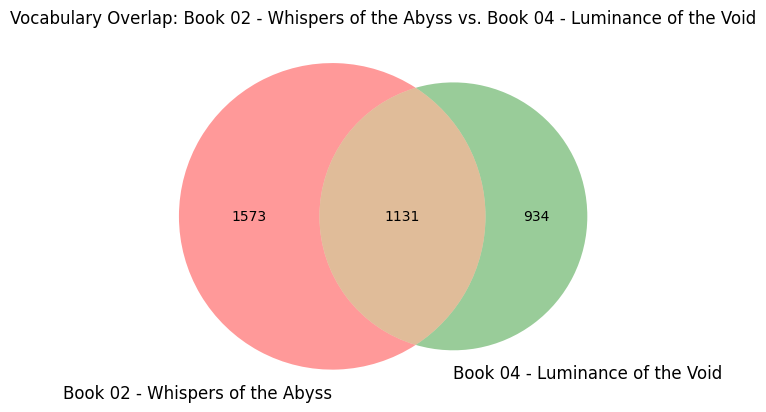

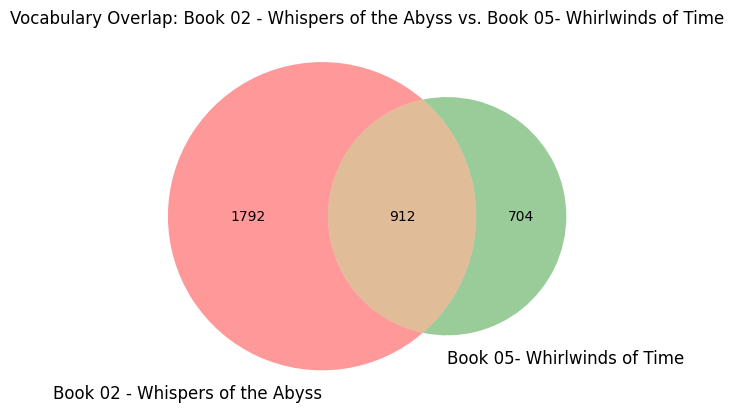

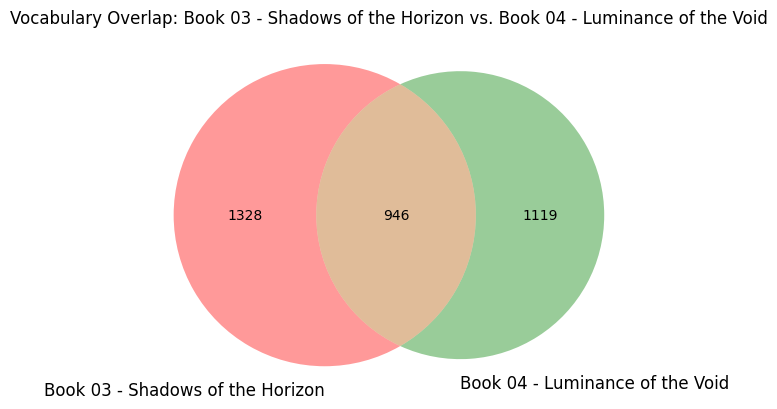

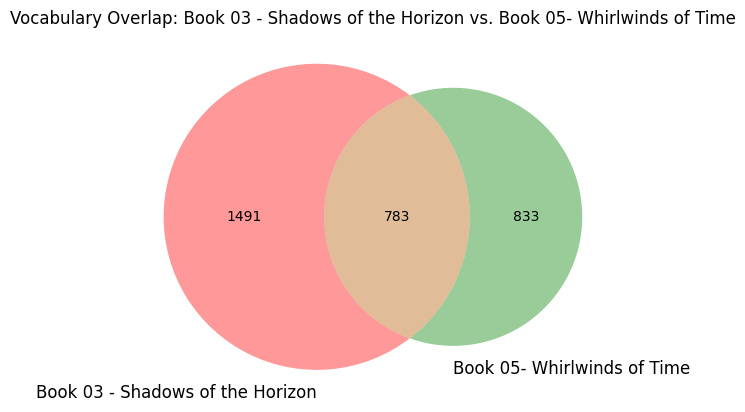

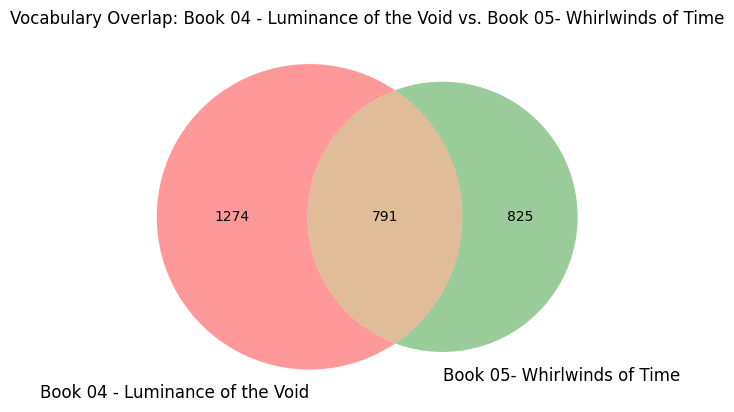

In [7]:
import os
from itertools import combinations
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import re

# Function to tokenize words in a text
def tokenize_words(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # Tokenize words using regex
    return set(words)

# Book file paths
BOOKS_DIR = ''  # Directory for the book files
book_file_paths = [os.path.join(BOOKS_DIR, file_name) for file_name in book_file_names]

# Create word sets for each book
book_info = []
for file_path in book_file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        title = os.path.splitext(os.path.basename(file_path))[0]  # Extract title from file name
        text = f.read()
        words_set = tokenize_words(text)
        book_info.append({'title': title, 'words_set': words_set})

# Create Venn diagrams for all possible combinations of 2 books (if available)
combinations_2 = list(combinations(book_info, 2))
for combo in combinations_2:
    word_sets = {}
    for book in combo:
        title = book['title']
        word_sets[title] = book['words_set']

    venn2(subsets=word_sets.values(), set_labels=word_sets.keys())
    plt.title('Vocabulary Overlap: ' + ' vs. '.join(word_sets.keys()))
    plt.show()

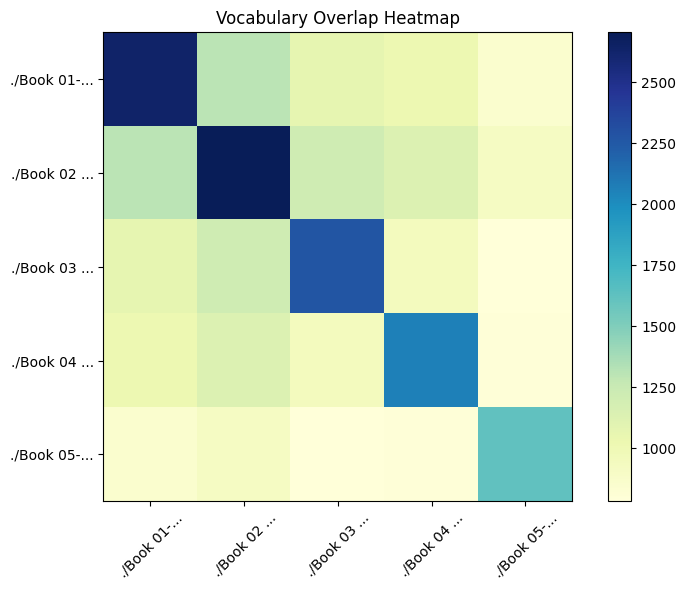

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re
from itertools import combinations

# Function to tokenize words in a text
def tokenize_words(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # Tokenize words using regex
    return set(words)

# Function to shorten titles
def shorten_title(title, max_length=10):
    if len(title) > max_length:
        return title[:max_length] + "..."
    else:
        return title

# Prepare book data
book_file_paths = ['./' + file_name for file_name in book_file_names]

book_info = []
for file_path in book_file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        title = file_path.replace('./books/', '').replace('.txt', '')
        text = f.read()
        words_set = tokenize_words(text)
        book_info.append({'title': title, 'words_set': words_set})

# Create a matrix indicating vocabulary overlap
overlap_matrix = np.zeros((len(book_info), len(book_info)), dtype=int)

for i, book1 in enumerate(book_info):
    for j, book2 in enumerate(book_info):
        common_words = len(book1['words_set'].intersection(book2['words_set']))
        overlap_matrix[i, j] = common_words

# Create a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(overlap_matrix, cmap='YlGnBu', interpolation='nearest')

plt.title('Vocabulary Overlap Heatmap')
plt.colorbar()
shortened_titles = [shorten_title(book['title']) for book in book_info]
plt.xticks(np.arange(len(book_info)), shortened_titles, rotation=45)
plt.yticks(np.arange(len(book_info)), shortened_titles)
plt.tight_layout()
plt.show()

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.probability import FreqDist

# Download NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize empty lists to store words
adverbs = []
adjectives = []
nouns = []
verbs = []

book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

# Process each book
for file_name in book_file_names:
    with open(f"./{file_name}", "r", encoding="utf-8") as f:
        # Read the text from file
        text = f.read()

        # Tokenize words and perform part-of-speech tagging
        tokens = word_tokenize(text)
        tagged_words = pos_tag(tokens)

        # Categorize words based on parts of speech
        for word, pos in tagged_words:
            if pos.startswith('RB'):  # Adverb
                adverbs.append(word.lower())
            elif pos.startswith('JJ'):  # Adjective
                adjectives.append(word.lower())
            elif pos.startswith('NN'):  # Noun
                nouns.append(word.lower())
            elif pos.startswith('VB'):  # Verb
                verbs.append(word.lower())

        # Calculate the most common words for each category
        def most_common_words(word_list, num_words=10):
            fdist = FreqDist(word_list)
            return ", ".join([word for word, freq in fdist.most_common(num_words)])

        # Print the results for each book
        adverbs_list = most_common_words(adverbs)
        adjectives_list = most_common_words(adjectives)
        nouns_list = most_common_words(nouns)
        verbs_list = most_common_words(verbs)

        print("Book Title:", file_name)
        print("Common Adverbs:", adverbs_list)
        print("Common Adjectives:", adjectives_list)
        print("Common Nouns:", nouns_list)
        print("Common Verbs:", verbs_list)
        print("="*80)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vidus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vidus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Book Title: Book 01- Echoes of Tomorrow.txt
Common Adverbs: not, just, once, now, then, n't, here, together, down, even
Common Adjectives: old, *, holographic, united, many, first, new, more, young, vast
Common Nouns: city, lia, mira, caden, uppers, *, lowers, unity, mids, eyes
Common Verbs: was, had, were, began, 's, be, is, been, *, have
Book Title: Book 02 - Whispers of the Abyss.txt
Common Adverbs: not, just, n't, now, once, together, however, here, forward, then
Common Adjectives: old, *, new, potential, many, vast, ancient, first, united, holographic
Common Nouns: city, evan, abyss, nila, dara, *, lia, mira, caden, unity
Common Verbs: was, had, were, is, 's, be, began, *, are, been
Book Title: Book 03 - Shadows of the Horizon.txt
Common Adverbs: not, just, n't, now, once, together, however, ever, even, forward
Common Adjectives: *, old, potential, new, vast, grand, ancient, many, united, first
Common Nouns: city, evan, horizon, abyss, *, nila, dara, lia, elara, mira
Common Verbs:

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vidus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vidus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\vidus\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


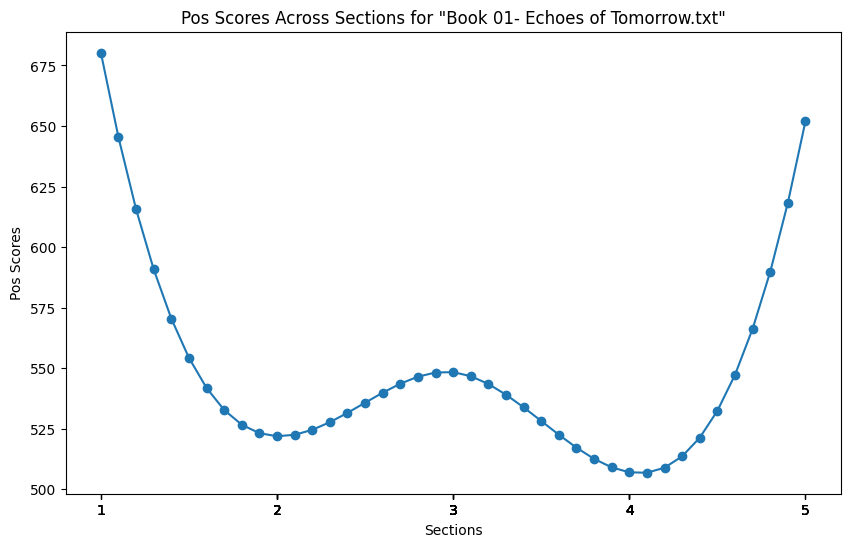

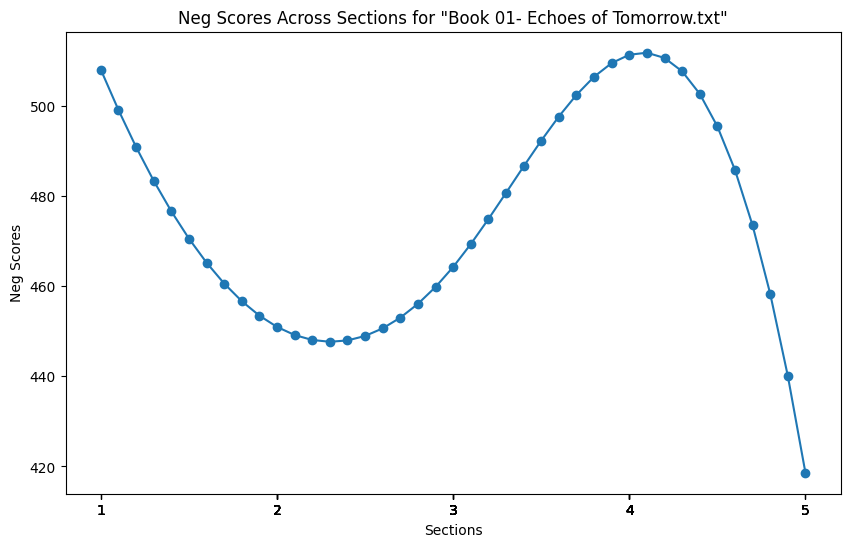

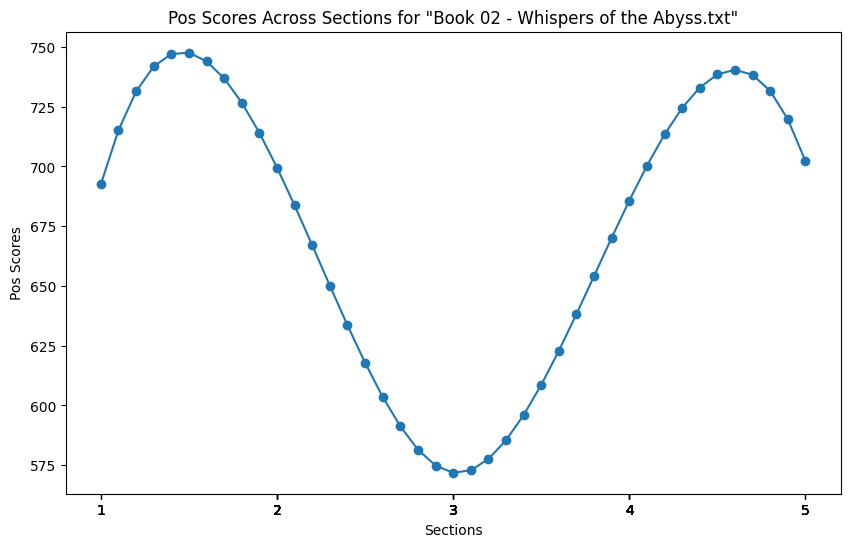

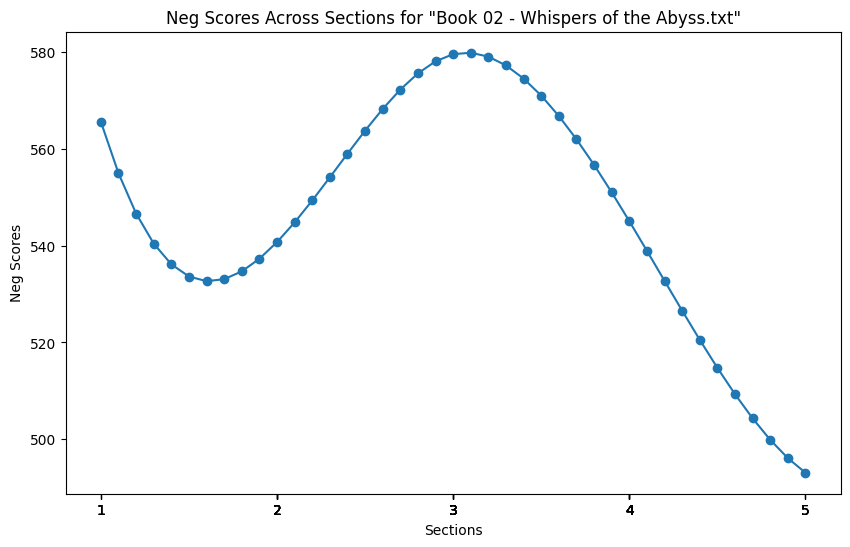

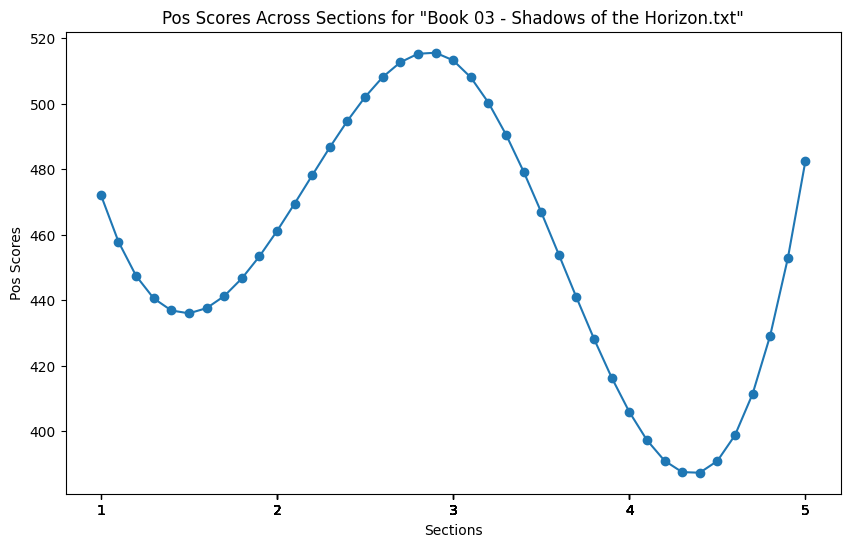

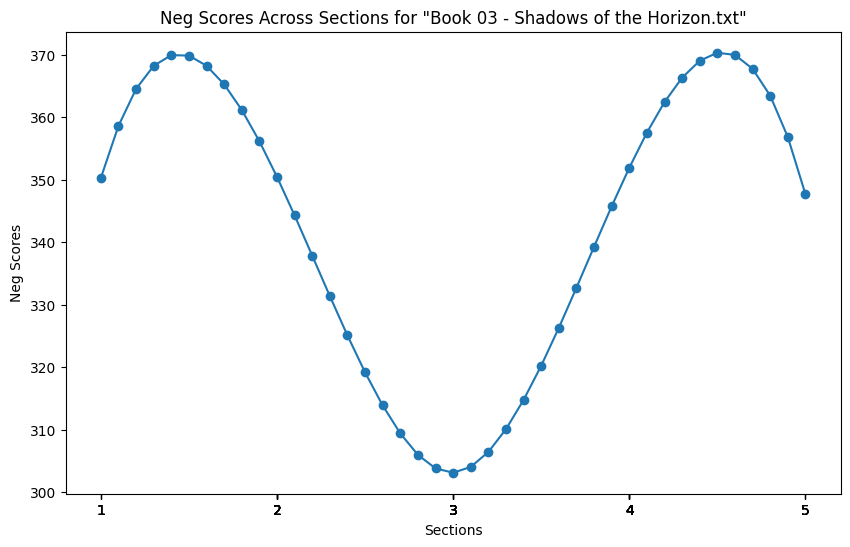

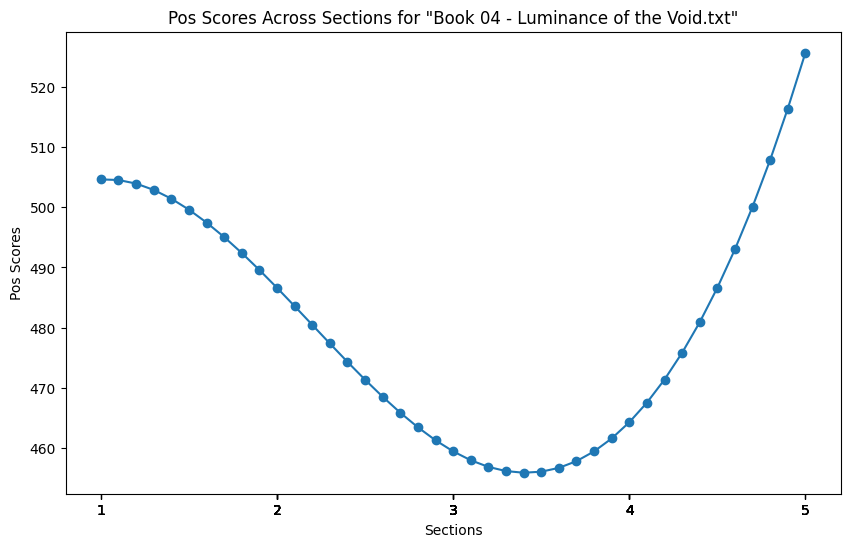

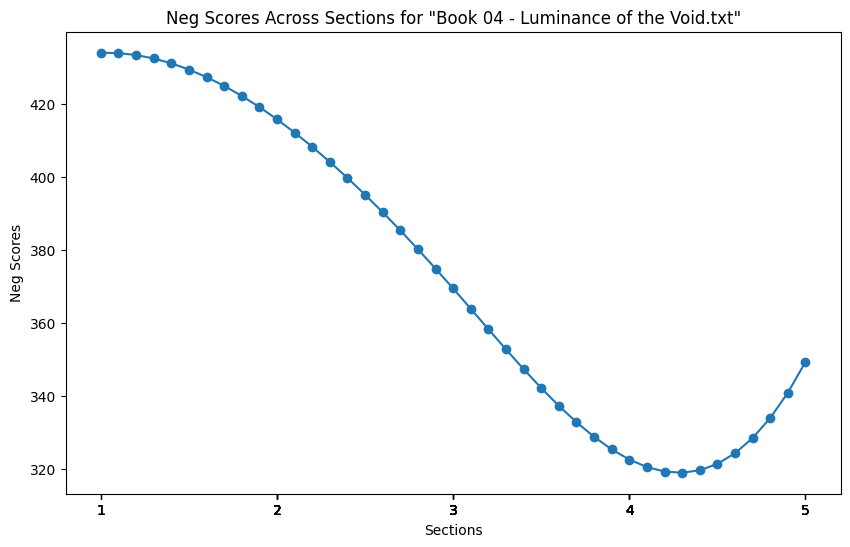

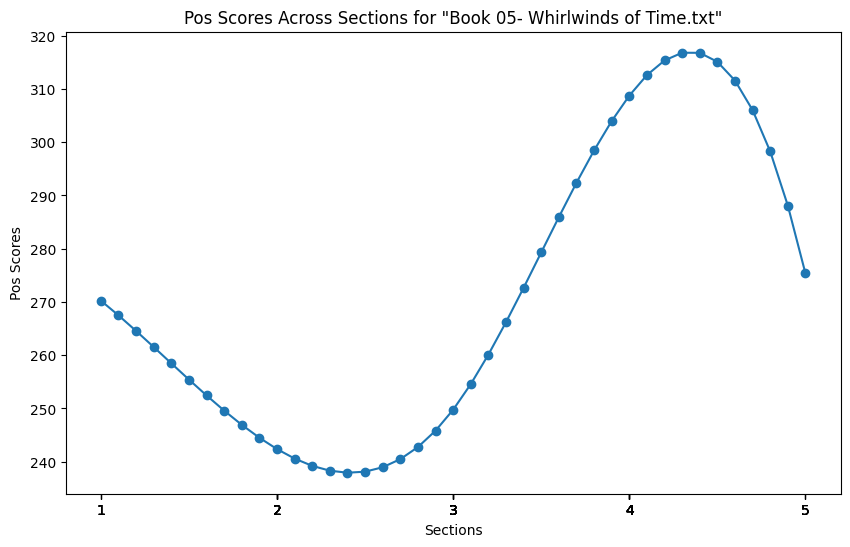

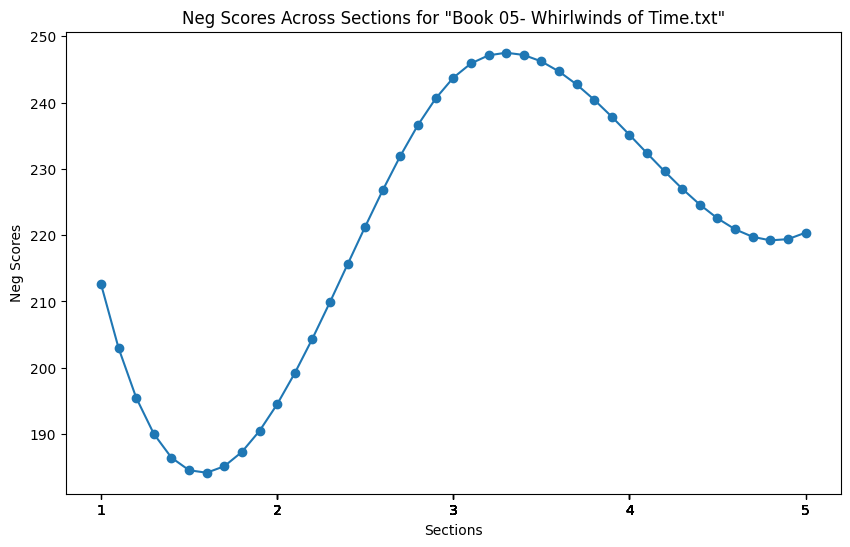

In [10]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('sentiwordnet')

book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]

emotions = ['pos', 'neg']

def get_emotion_scores(word):
    synsets = wn.synsets(word)
    emotion_scores = {emo: 0 for emo in emotions}

    for synset in synsets:
        senti_synset = swn.senti_synset(synset.name())
        for emo in emotions:
            emotion_scores[emo] += getattr(senti_synset, emo+'_score')()

    return emotion_scores

# Emotional analysis for each book
for file_name in book_file_names:
    with open(f"./{file_name}", "r", encoding="utf-8") as f:
        text = f.read()
        words = nltk.word_tokenize(text.lower())
        num_words = len(words)
        section_size = num_words // 5
        sections = [words[i:i+section_size] for i in range(0, num_words, section_size)]

        section_emotion_scores = []
        for section in sections:
            section_scores = {emo: 0 for emo in emotions}
            for word in section:
                emotion_scores = get_emotion_scores(word)
                for emo in emotions:
                    section_scores[emo] += emotion_scores[emo]
            section_emotion_scores.append(section_scores)

        for emo in emotions:

            scores = [section_score[emo] for section_score in section_emotion_scores[:5]]

            # Interpolation for smoother curves
            x = np.linspace(1, 5, num=5, endpoint=True)
            y = scores
            f2 = interp1d(x, y, kind='cubic')

            xnew = np.linspace(1, 5, num=41, endpoint=True)

            plt.figure(figsize=(10, 6))
            plt.plot(xnew, f2(xnew), marker='o')  # Using interpolated values for y
            plt.xlabel('Sections')
            plt.ylabel(f'{emo.capitalize()} Scores')
            plt.title(f'{emo.capitalize()} Scores Across Sections for "{file_name}"')
            plt.xticks(np.round(xnew))
            plt.show()